In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('car_details_ford_focus.csv')

In [2]:
# Model Evaluation
# In-sample evaluation tells us how well our model will fit the data used to train it
# Problem ?
# - It doesn't tell us how well the trained model can be used to predict new data
# Solution ?
# - In sample data or training data
# - Out of sample evaluation or test set

In [3]:
# Split dataset into : Training set(70%), Testing Set(30%)
# Build and train the model with a training set
# Use testing set to assess the performance of a predictive model
# When we have completed testing our model we should use all the data to train the model to get the best performance

In [4]:
from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=0)
# random_state : number generator used for random sampling

In [5]:
# Generalization Performance
# Generalization error is measure of how well our data does at predicting previously unseen data
# The error we obtain using our testing data is an approximation of this error

In [6]:
# Cross Validation
# Most common out-of-sample evaluation metrics
# More effective use of data (each observation is used for both training and testing)
from sklearn.model_selection import cross_val_score
#scores = cross_val_score(lr, x_data, y_data, cv=3)
# cv : Number of partitions, split 3 equal partitions
#np.mean(scores)
# cross_val_predict
# It returns the prediction that was obtained for each element when it was in the test set
# Has a similar interface to cross_val_score

In [8]:
# Over-fitting, Under-fitting and Model Selection
# Calculate Polynomial order with R^2 score ?

In [10]:
# Ridge Regression
# prevents overfitting
from sklearn.linear_model import Ridge
#ridge_model = Ridge(alpha=0.1)
#ridge_model.fit(X,y)
#Yhat = ridge_model.predict(X)"""

In [13]:
# Grid Search
# Hyperparameters
# Scikit-learn has a means of automatically iterating over these hyperparameters using cross-validation called Grid Search
# Divide Data to Training set, validation set, and test set
# We use hyperparameters from validation set
from sklearn.model_selection import GridSearchCV
parameters1 = [{'alpha':[0.001,0.1,1,10,100,1000,10000,100000]}]
RR = Ridge()
Grid1 = GridSearchCV(RR, parameters1, cv=4)
Grid1.fit(df[['cc','km','hp','year']], df['price'])
scores = Grid1.cv_results_
scores['mean_test_score']

array([0.8583098 , 0.8583097 , 0.85830876, 0.85829903, 0.8581694 ,
       0.85437801, 0.78293981, 0.65597682])

In [14]:
Grid1.best_estimator_

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [15]:
parameters2 = [{'alpha':[0.001,0.1,1,10,100,1000,10000,100000], 'normalize':[True, False]}]
RR = Ridge()
Grid2 = GridSearchCV(RR, parameters2, cv=4)
Grid2.fit(df[['cc','km','hp','year']], df['price'])
scores2 = Grid2.cv_results_
scores2['mean_test_score']

array([ 0.85830221,  0.8583098 ,  0.85411512,  0.8583097 ,  0.74474279,
        0.85830876,  0.25111113,  0.85829903,  0.02984847,  0.8581694 ,
        0.00098161,  0.85437801, -0.0019908 ,  0.78293981, -0.00228892,
        0.65597682])

In [16]:
Grid2.best_estimator_

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [18]:
# Training and Testing
df = df._get_numeric_data()
df.head()

,id,year,km,hp,cc,price
0,784949216,2009,210.0,115,1596,61.75
1,784919763,2012,94.0,125,1596,96.95
2,784789340,2014,136.0,125,1596,86.90
3,784791962,2006,190.0,110,1560,52.90
4,784548131,2003,281.0,100,1753,37.90


In [20]:
df.drop("id", axis=1, inplace=True)
df.head()

,year,km,hp,cc,price
0,2009,210.0,115,1596,61.75
1,2012,94.0,125,1596,96.95
2,2014,136.0,125,1596,86.90
3,2006,190.0,110,1560,52.90
4,2003,281.0,100,1753,37.90


In [22]:
%%capture
! pip install ipywidgets

In [23]:
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

In [43]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in TL)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [25]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [26]:
y_data = df['price']

In [27]:
x_data=df.drop('price',axis=1)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=0)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 249
number of training samples: 578


In [29]:
from sklearn.linear_model import LinearRegression
lre=LinearRegression()
lre.fit(x_train[['hp']], y_train)
lre.score(x_test[['hp']], y_test)

0.0789760729358282

In [31]:
lre.score(x_train[['hp']], y_train)

0.1744638593620771

In [32]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score
r_cross = cross_val_score(lre, x_data[['hp']], y_data, cv=4)
r_cross

array([0.16384646, 0.14297584, 0.17371231, 0.11237046])

In [33]:
print("The mean of the folds are", r_cross.mean(), "and the standard deviation is" , r_cross.std())

The mean of the folds are 0.14822626847185705 and the standard deviation is 0.023487947633846238


In [35]:
-1 * cross_val_score(lre,x_data[['hp']], y_data,cv=4,scoring='neg_mean_squared_error')

array([853.71062034, 844.05612345, 701.30419509, 900.60536193])

In [37]:
from sklearn.model_selection import cross_val_predict
yhat = cross_val_predict(lre,x_data[['hp']], y_data,cv=4)
yhat[0:5]

array([89.14988182, 99.50364354, 99.50364354, 83.97300097, 73.61923925])

In [38]:
# Overfitting, Underfitting and Model Selection
lr = LinearRegression()
lr.fit(x_train[['hp', 'cc', 'km', 'year']], y_train)
yhat_train = lr.predict(x_train[['hp', 'cc', 'km', 'year']])
yhat_train[0:5]

array([ 25.4799438 ,  70.95282235,  26.71443218,  70.38084903,
       114.63318822])

In [39]:
yhat_test = lr.predict(x_test[['hp', 'cc', 'km', 'year']])
yhat_test[0:5]

array([125.42789196, 106.62432019, 115.33213962, 106.13162137,
       109.83325519])

In [40]:
%matplotlib inline

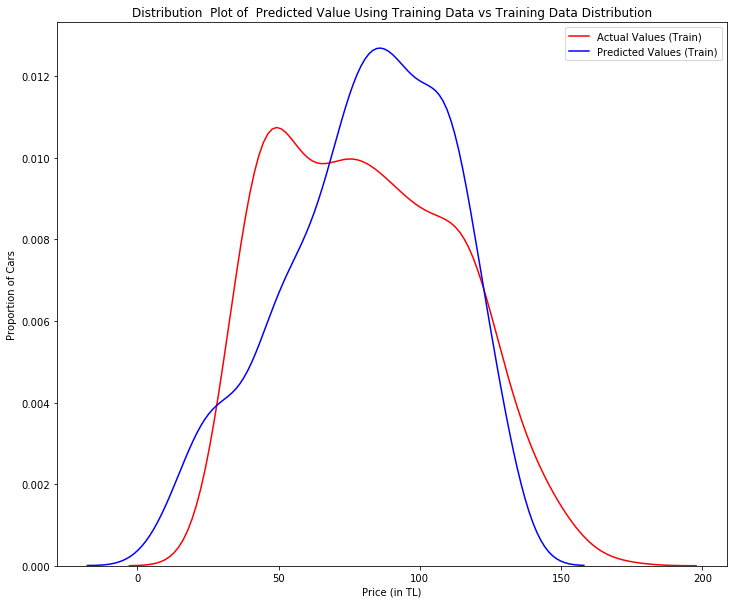

In [44]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

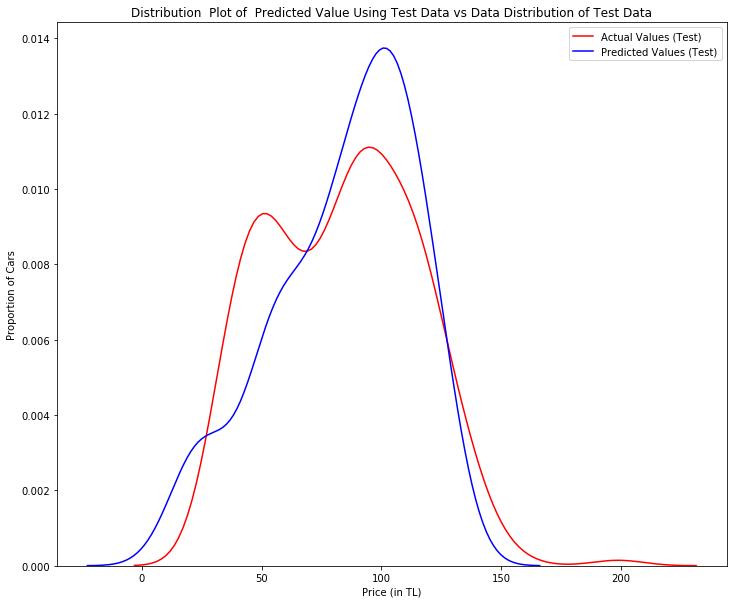

In [45]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [110]:
#Overfitting
# couldn't overfit with my data :)
from sklearn.preprocessing import PolynomialFeatures
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [111]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['year']])
x_test_pr = pr.fit_transform(x_test[['year']])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False,
                   order='C')

In [112]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [113]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([139.71657682,  94.05149198, 114.55126223, 114.55126223,
        94.05149198])

In [114]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [139.71657682  94.05149198 114.55126223 114.55126223]
True values: [136.45 107.   121.75  89.  ]


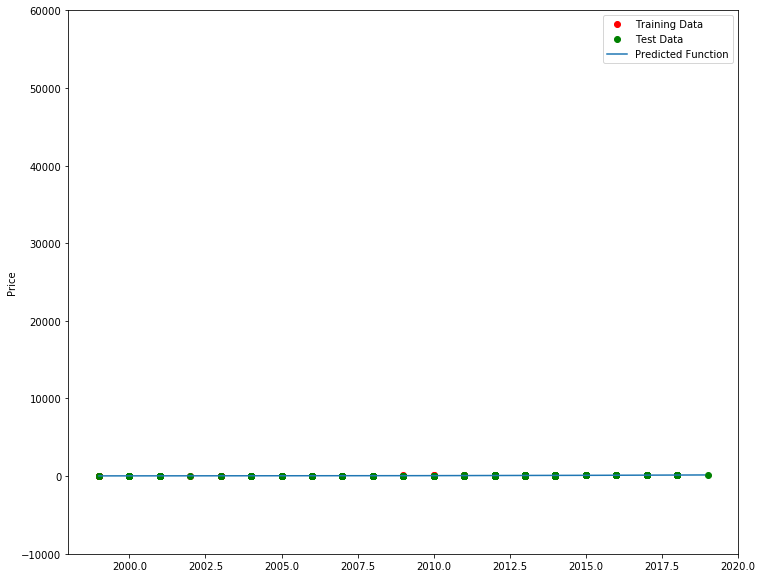

In [115]:
PollyPlot(x_train[['year']], x_test[['year']], y_train, y_test, poly,pr)

In [116]:
poly.score(x_train_pr, y_train)

0.8787168606440984

In [117]:
poly.score(x_test_pr, y_test)

0.869370995804994

Text(3, 0.75, 'Maximum R^2 ')

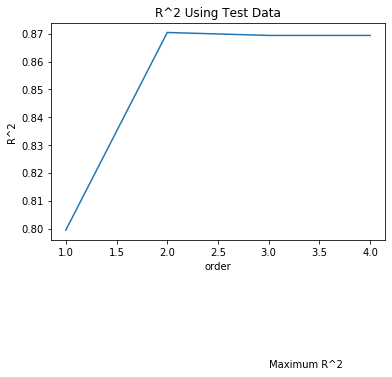

In [118]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['year']])
    
    x_test_pr = pr.fit_transform(x_test[['year']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ') 

In [122]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['year']])
    x_test_pr = pr.fit_transform(x_test[['year']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['year']], x_test[['year']], y_train,y_test, poly, pr)

In [123]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>